In [8]:
import meep as mp

cell = mp.Vector3(16,8,0)
w=1
geometry = [mp.Block(mp.Vector3(mp.inf,w,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=12))]

#Define our eigenmode source
fsrc = 0.15 #Vacuum wavelength = 1550nm
bnum = 1     #Inject fundamental mode (band number 1)

sources = [mp.EigenModeSource(src=mp.ContinuousSource(fsrc),   #Define a single frequency source
                                  center=mp.Vector3(),         #Define the origin of the source
                                  size=mp.Vector3(y=3*w),      #Source is 3x wider than the waveguide width
                                  direction=mp.X,              #Inject along x-axis
                                  eig_band=bnum,               #Look at band number num
                                  eig_parity=mp.EVEN_Y,         #Look at y odd (TE)
                                  eig_match_freq=True)]        #Find the mode with frequency = fsrc and launch this (as opposed to launching based on the k-point)

pml_layers = [mp.PML(1.0)]
resolution = 10

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

sim.run(until=200)


-----------
Initializing structure...
time for choose_chunkdivision = 9.39369e-05 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.024128 s
-----------
MPB solved for omega_1(0.519615,0,0) = 0.17693 after 15 iters
MPB solved for omega_1(0.42265,0,0) = 0.149862 after 8 iters
MPB solved for omega_1(0.42314,0,0) = 0.15 after 5 iters
MPB solved for omega_1(0.42314,0,0) = 0.15 after 1 iters
run 0 finished at t = 200.0 (4000 timesteps)


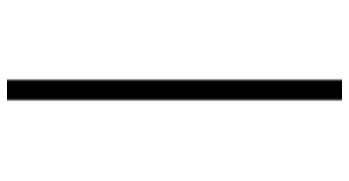

In [4]:
import numpy as np
import matplotlib.pyplot as plt

eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

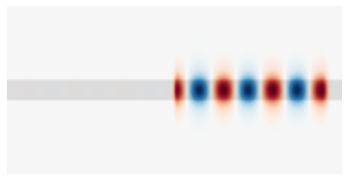

In [9]:
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()